## <center>Práctica de **EDA**</center>

<div style="text-align: justify;">
Para este ejercicio, se utilizará el siguiente dataset: <b><a href="https://www.kaggle.com/datasets/narmelan/100-most-spoken-languages-around-the-world">Top 100 Languages.</a></b>
</div>

<div style="text-align: justify;">
Primero, haremos la lectura de los datos:
</div>

In [13]:
import pandas as pd

data = pd.read_csv('/home/danielhz19/Documents/VSCode/UCV/ELECTIVAS/DM/data/Top 100 Languages.csv')
df = pd.DataFrame(data)
df

,Language,Total Speakers,Native Speakers,Origin
0,English,1132366680,379007140.0,Indo-European
1,Mandarin Chinese,1116596640,917868640.0,Sino-Tibetan
2,Hindi,615475540,341208640.0,Indo-European
3,Spanish,534335730,460093030.0,Indo-European
4,French,279821930,77177210.0,Indo-European
...,...,...,...,...
95,Cameroonian Pidgin,12000000,NaN,Indo-European
96,Sylheti,11800000,10300000.0,Indo-European
97,South Levantine Spoken Arabic,11601100,11601100.0,Afro-Asiatic
98,Tunisian Spoken Arabic,11571600,11571600.0,Afro-Asiatic


<div style="text-align: justify;">
Se puede observar que el inglés resulta como el idioma más hablado en este ranking, el cual posee fecha de 2020. Sin embargo me resulta curiosa la gran cantidad de variaciones existentes para el idioma árabe y chino, por lo que un ejercicio interesante a realizar será agrupar los datos de todas estas variantes y compararlas.
</div>

In [14]:
chinese_group = df[df['Language'].str.contains('Chinese', case=False)]
chinese_group = chinese_group.drop(columns = ['Native Speakers', 'Origin'])
chinese_group


,Language,Total Speakers
1,Mandarin Chinese,1116596640
17,Wu Chinese,81501290
22,Yue Chinese,73538610
32,Southern Min Chinese,50462190
33,Hakka Chinese,48467490
34,Jinyu Chinese,46900000
41,Xiang Chinese,37300000
61,Gan Chinese,22100000


In [15]:
arabic_group = df[df['Language'].str.contains('Arabic', case=False)]
arabic_group = arabic_group.drop(columns = ['Native Speakers', 'Origin'])
arabic_group

,Language,Total Speakers
5,Standard Arabic,273989700
25,Egyptian Spoken Arabic,64618100
44,Moroccan Spoken Arabic,32608700
47,Algerian Spoken Arabic,32387600
48,Sundanese Spoken Arabic,31940300
55,North Levantine Spoken Arabic,24587400
60,Sa'idi Spoken Arabic,22400000
73,Mesopotamian Spoken Arabic,15655900
77,Hijazi Spoken Arabic,14524500
97,South Levantine Spoken Arabic,11601100


<div style="text-align: justify;">
Ahora, vamos a crear un nuevo Data Frame que contenga el total de personas que hablan el idioma, el cual usaremos para la visualización.
</div>

In [16]:
#   Filtramos la data del idioma ingles y la agregamos al data frame
viz_df = df[df['Language'] == "English"]
viz_df = viz_df.drop(columns = ['Native Speakers', 'Origin'])

#   Filtramos la data del español para agregarla al data frame
spanish_df = df[df['Language'] == "Spanish"]
spanish_df = spanish_df.drop(columns = ['Native Speakers', 'Origin'])

#   Filtramos la data del hindi para agregarla al data frame
hindi_df = df[df['Language'] == "Hindi"]
hindi_df = hindi_df.drop(columns = ['Native Speakers', 'Origin'])

#   Calculamos el total de speakers para el árabe 
#   y creamos una nueva fila para añadirla al data frame
arabic_speakers = arabic_group['Total Speakers'].sum()
arabic_df = {'Language': "Arabic (grouped)", 'Total Speakers': arabic_speakers}

#   Calculamos el total de speakers para el chino 
#   y creamos una nueva fila para añadirla al data frame
chinese_speakers = chinese_group['Total Speakers'].sum()
chinese_df = {'Language': "Chinese (grouped)", 'Total Speakers': chinese_speakers}

#   Se agregan las filas calculadas al data frame
new_index = len(viz_df)
viz_df.loc[new_index] = chinese_df
new_index+=1
viz_df.loc[new_index] = arabic_df

viz_df = pd.concat([viz_df, hindi_df])
viz_df = pd.concat([viz_df, spanish_df])

viz_df = viz_df.sort_values(by = 'Total Speakers', ascending = False)
viz_df

,Language,Total Speakers
1,Chinese (grouped),1476866220
0,English,1132366680
2,Hindi,615475540
2,Arabic (grouped),547234900
3,Spanish,534335730


<div style="text-align: justify;">
Gráficamente podemos representarlo de la siguiente manera:
</div>

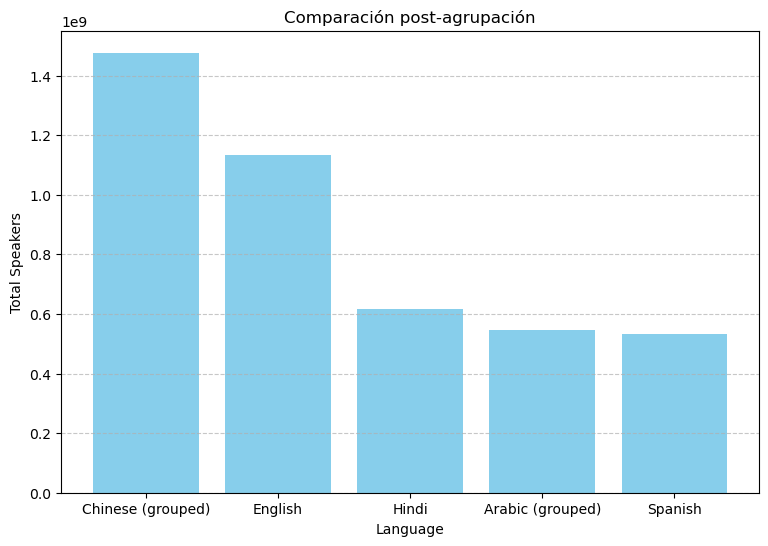

In [17]:
import matplotlib.pyplot as plt

language = viz_df['Language']
values = viz_df['Total Speakers']

plt.figure(figsize=(9, 6))
plt.bar(language, values, color='skyblue')

plt.title("Comparación post-agrupación")
plt.xlabel("Language")
plt.ylabel("Total Speakers")
plt.xticks(rotation=0)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

plt.show()

<div style="text-align: justify;">
Como ejercicio final, podemos intentar observar cual es el origen más común para la mayor cantidad de idiomas disponibles en el dataset. Para esto debemos saber los posibles valores de la variable y luego obtener la cantidad total de observaciones que poseen dicho valor.
</div>

In [18]:
distinct_origin_df = pd.DataFrame(df['Origin'])
distinct_origin_df = distinct_origin_df.drop_duplicates()

distinct_origin_df

,Origin
0,Indo-European
1,Sino-Tibetan
5,Afro-Asiatic
9,Austronesian
12,Japanic
13,Niger-Congo
15,Dravidian
19,Turkic
20,Koreanic
27,Kra-Dai


In [19]:
indo_euro_value = len(df[df['Origin'] == "Indo-European"])
sino_tibetan_value = len(df[df['Origin'] == "Sino-Tibetan"])
afro_asiatic_value = len(df[df['Origin'] == "Afro-Asiatic"])
austro_value = len(df[df['Origin'] == "Austronesian"])
japanic_value = len(df[df['Origin'] == "Japanic"])
niger_congo_value = len(df[df['Origin'] == "Niger-Congo"])
dravidian_value = len(df[df['Origin'] == "Dravidian"])
turkic_value = len(df[df['Origin'] == "Turkic"])
koreanic_value = len(df[df['Origin'] == "Koreanic"])
kra_dai_value = len(df[df['Origin'] == "Kra-Dai"])
uralic_value = len(df[df['Origin'] == "Uralic"])

new_column = [
    indo_euro_value, sino_tibetan_value, afro_asiatic_value, austro_value,
    japanic_value, niger_congo_value, dravidian_value, turkic_value,
    koreanic_value, kra_dai_value, uralic_value
    ]

distinct_origin_df['Total of languages generated'] = new_column

distinct_origin_df

,Origin,Total of languages generated
0,Indo-European,42
1,Sino-Tibetan,9
5,Afro-Asiatic,15
9,Austronesian,9
12,Japanic,1
13,Niger-Congo,12
15,Dravidian,4
19,Turkic,4
20,Koreanic,1
27,Kra-Dai,2


<div style="text-align: justify;">
Para la visualización, se decidió utilizar un gráfico de torta de forma que se pueda apreciar la dimensión que tiene cada origen respecto a los demás.
</div>

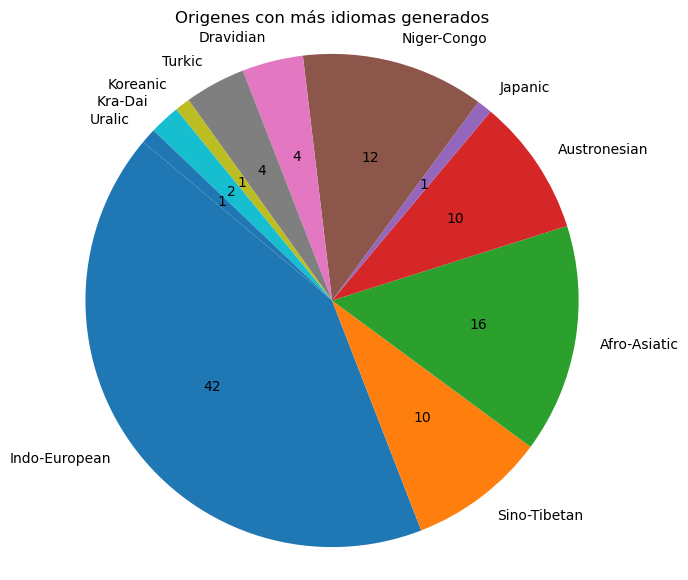

In [22]:
pie_labels = distinct_origin_df['Origin']
pie_values = distinct_origin_df['Total of languages generated']

plt.figure(figsize = (7, 7))
plt.pie(pie_values, labels = pie_labels, autopct = lambda pct: int(pct)+1, startangle = 140)

plt.title("Origenes con más idiomas generados")
plt.axis('equal')

plt.show()